# Project: Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Why would a patient be absent to an appointment? We tackle this question during this project. 

The dataset that I am going to study during this project is related to this question. It gives general information of a patient and whether he/she showed up to an appointment.

Specificly, I'm going to focus on the following questions:
<ol>
    <a href = "#quest1"><li> Is the age related to the rate of assistance? </li> </a>
    <a href = "#quest2"><li> Is the gender and age related to the rate of assistance? </li> </a>
    <a href = "#quest3"><li> Does receiving a sms affect the rate of assistance?</li> </a>
    <a href = "#quest4"><li> Do the age and receiving a sms affect the rate of assistance? </li> </a>
    <a href = "#quest5"><li> Is there any difference in assistance between patients that make an appointment for the same day in comparison to the ones that do not? </li> </a>
</ol>

The dataset can be downloaded [here](https://www.kaggle.com/joniarroba/noshowappointments/version/5)

In [1]:
#First, we start importing the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General:

In [2]:
#We read the csv file:
data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

#And we check that we have read correctly:
data.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [3]:
# First, I'm going to start modifying the name of the columns.
# I prefer to have all my column names in lower case:

data.rename(columns = lambda x:x.lower(),inplace = True)
data.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [4]:
# By doing so, I notice that the columns that have a phrase as a name 
# don't look well, so I'm going to change that

new_name = data.columns.values
for i,aux in enumerate(data.columns.values):
    if(aux[-2:]=='id'):
        new_name[i] = aux[:-2] + '_' + 'id'
    if(aux[-3:]=='day'):
        new_name[i] = aux[:-3] + '_' + 'day'

In [5]:
#We save the changes:

data.columns = new_name
data.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no-show'],
      dtype='object')

In [6]:
# I should also replace the dash in no-show by an underscore

data.rename(columns = lambda x:x.replace('-','_'),inplace = True)
data.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show'],
      dtype='object')

In [7]:
# Now I am going to check the datatypes:

data.dtypes

patient_id         float64
appointment_id       int64
gender              object
scheduled_day       object
appointment_day     object
age                  int64
neighbourhood       object
scholarship          int64
hipertension         int64
diabetes             int64
alcoholism           int64
handcap              int64
sms_received         int64
no_show             object
dtype: object

In [8]:
# We notice that we are saving the patient_id as float, which shouldn't be the case. 
# Instead we are going to change that to string type or as integer.
# We also are able to see that we should have the dates as DateTime.

data['patient_id'] = data['patient_id'].astype(int)
data['scheduled_day'] = pd.to_datetime(data['scheduled_day'])
data['appointment_day'] = pd.to_datetime(data['appointment_day'])
data.dtypes

patient_id                  int64
appointment_id              int64
gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighbourhood              object
scholarship                 int64
hipertension                int64
diabetes                    int64
alcoholism                  int64
handcap                     int64
sms_received                int64
no_show                    object
dtype: object

In [9]:
#We confirm that the new representation is correct:
data.head(3)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No


### Duplicates and null values
After confirming that my columns are the way I prefer, I can safely start checking the other two most common types of errors:

In [10]:
#We are going to start with the null values:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hipertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handcap            110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


In [11]:
# We see that all values are complete, we confirm that by:
# 1) Comparing it with the shape of the DataFrame
data.shape

(110527, 14)

In [12]:
# or by 2) Using pandas:
sum(data.isnull().any(axis=1))

0

In [13]:
# So it definetely does not have any null values. 
# Now let's check for duplicates:
# Let's use a basic pandas command:

sum(data.duplicated())

0

In [14]:
# We see that there are no two rows that are identical, 
# but what about the possible values?
data.nunique()

patient_id          62299
appointment_id     110527
gender                  2
scheduled_day      103549
appointment_day        27
age                   104
neighbourhood          81
scholarship             2
hipertension            2
diabetes                2
alcoholism              2
handcap                 5
sms_received            2
no_show                 2
dtype: int64

### Data Cleaning

Now that we've checked duplicates and null values, I'm going to start cleaning focusing on the questions that I've asked. That is, I'm going to drop some columns. I will maintain the original data in other variable just in case.
<br>
And instead of using scheduled_day and appointment_day. To answer the questions that I've asked I'm going to use the difference between the days instead.

In [15]:
#We add the new column as an integer in other variable
#We do so in order just in case.

data_modif = data
data_modif['diff_app'] = data_modif.appointment_day - data_modif.scheduled_day
data_modif['diff_app'] = (data_modif.diff_app / np.timedelta64(1, 'D')).astype(int)
# diff_app stands for difference in the appointment

In [16]:
#We verify that the values are ok:
data_modif.diff_app.describe()

count    110527.000000
mean          9.532648
std          15.027798
min          -6.000000
25%           0.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: diff_app, dtype: float64

In [17]:
#There are some negative values, let's see why that's the case:
aux = data_modif[data_modif.diff_app<0]
aux

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,diff_app
27033,7839272661752,5679978,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7896293967868,5715660,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,24252258389979,5664962,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,998231581612122,5686628,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3787481966821,5655637,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [18]:
# I'm going to drop those columns because they do not make sense
data_modif = data_modif[data_modif.diff_app >= 0]
data_modif.shape

(110522, 15)

In [19]:
# Now I'm going to start dropping the columns that I'm not going to use:
# We drop the other two columns related to dates:
data_modif = data_modif.drop(['scheduled_day','appointment_day'],axis=1)

In [20]:
#We check that everything is fine:
data_modif.head(1)

,patient_id,appointment_id,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,diff_app
0,29872499824296,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0


In [21]:
#Finally, I will drop the other columns that I am not going to use.
data_modif = data_modif.drop(['appointment_id','neighbourhood','scholarship'],axis=1)
data_modif = data_modif.drop(['alcoholism','handcap','hipertension','diabetes'],axis=1)
data_modif.head(1)

,patient_id,gender,age,sms_received,no_show,diff_app
0,29872499824296,F,62,0,No,0


With this we can start analysing the data. There could be some extra cleaning steps that I might encounter while making the analysis, but I will handle that in the exploratory analysis.

<a id='eda'></a>
## Exploratory Data Analysis

<a id = 'quest1'></a>
### Research Question 1: Is the age related to wether the patient attends the appointment or not?

In [22]:
#First, in what range varies the age?
data_modif['age'].describe()

count    110522.000000
mean         37.089041
std          23.110064
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [23]:
#The -1 is something strange, the min age is -1, how is that possible?
aux = data_modif[data_modif['age'] == -1]
aux.shape

(1, 6)

In [24]:
#There is only one value, so let's see that case:
aux

,patient_id,gender,age,sms_received,no_show,diff_app
99832,465943158731293,F,-1,0,No,0


I'm going to check if this person has any other appointment so that we can correct her age. To do that I'm going to need the original data.

In [25]:
#Let's check is this patient has any other appointment:
aux_0 = data_modif[data_modif.age == -1]
data_modif[data_modif.patient_id == aux_0.patient_id.iloc[0]]

,patient_id,gender,age,sms_received,no_show,diff_app
99832,465943158731293,F,-1,0,No,0


In [26]:
# Even though her age is not possible, there is nothing weird about the other columns
# And we do not have any other information about her that we can contrast with.
# So it could have been a mistake. Let's ignore this row by now.
data_modif = data_modif[data_modif.age != -1]
data_modif.age.describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [27]:
# The other ages look reasonable, let's now make a bar graph to see if there
# is any relation between the age and the assitance.

# We are going to repeat three things over and over:
# The division into ages
# The normalization of the tables
# The graph procedure
# So let's make functions for each one of them

#First: division into ages:
def div_ages(array,x_div):
    return pd.cut(array.age,x_div,right = False).value_counts(sort = False)

In [28]:
#Normalization or proportion
def proc(array,x_div):
    
    #We divide and group by ages:
    array_ages = div_ages(array,x_div)
    
    #Who missed the appointment?
    array_missed = array[array.no_show == 'Yes']
    
    #Now we group them by ages.
    array_gr = div_ages(array_missed,x_div)
    
    #We should only consider proportion:
    array_prop = array_gr/array_ages
    
    #To avoid NaN values caused by division:
    array_prop.fillna(0,inplace = True)
    
    return array_prop

In [29]:
# I create two extra functions to create the divisions
# in order to maintain the main function as clear as possible
def create_x_div():
    arr = np.linspace(data_modif.age.min(),120,21)
    return arr.astype(int)

In [30]:
def create_x_axis(x_d):
    arr = x_d[1:]
    return arr.astype(int)

In [31]:
# Finally, the graph:
def gr_ages(title,x,y,array1,name1,col1,array2 = [], name2 = None,col2 = None):
    
    x_div = create_x_div()
    
    array_prop1 = proc(array1,x_div)
    if(type(array2)!=list):
        array_prop2 = proc(array2,x_div)
    
    #Now we graph:
    #First we need some values:
    x_axis = create_x_axis(x_div) 
    width = (120)/20
    y_ticks = np.around(np.linspace(0,1,11),decimals = 1)
    
    #Now that we have the values, let's graph it:
    plt.figure(figsize = (15,15))
    plt.title(title,fontsize = 25)
    
    plt.bar(x_axis - width/2, array_prop1.values, width, alpha=0.5, label = name1, color = col1)
    if(type(array2)!=list):
        plt.bar(x_axis - width/2, array_prop2.values,width,alpha= 0.5, label = name2,color = col2)
    
    plt.xlabel(x,fontsize = 20)
    plt.ylabel(y, fontsize = 20)
    
    plt.xticks(x_div,x_div,fontsize = 15)
    plt.yticks(y_ticks,y_ticks,fontsize = 15)
    
    plt.legend(fontsize = 15)
    

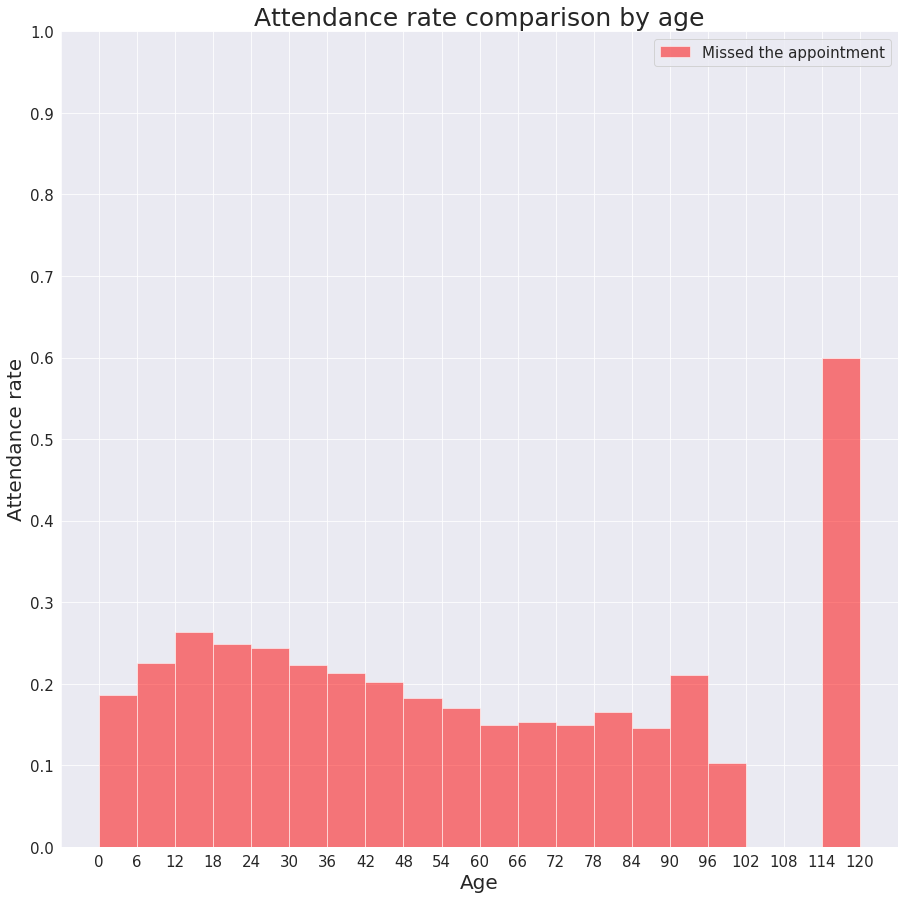

In [32]:
#Now, let's use that function:

gr_ages('Attendance rate comparison by age','Age','Attendance rate',data_modif,'Missed the appointment','r')   

There are some observations to make here:
<ul>
    <li> The only bar that has more no assistance over assistance is the last one (more than 0.5). We should review how many people are there to check whether we could make any conclusion or not. </li>
    <li> There is a peak between 12 and 18 years. </li>
    <li> There is a (local) peak between 90 and 96 years.</li>
</ul>
I am going to explore each of them in the following cells.

In [33]:
#First, from 114 to 120 years:
temp = data_modif[data_modif.age>=114]
temp.shape

(5, 6)

In [34]:
#We notice that there are only 5 values, let's explore them more:
temp

,patient_id,gender,age,sms_received,no_show,diff_app
63912,31963211613981,F,115,0,Yes,2
63915,31963211613981,F,115,0,Yes,2
68127,31963211613981,F,115,0,Yes,37
76284,31963211613981,F,115,0,No,0
97666,748234579244724,F,115,1,No,14


We see that 4 out of 5 appointments are of the same patient, if we make any conclusion it would be about an specific person instead of a group of people. Even more, there is not enough data to conclude anything, so we can't make any conclusions about this group.

In [35]:
# Since we are going to restrict ourselves to some ages multiple times and 
# we are going to get the average a lot, let's make those functions:

def rest_age(low,top):
    return data_modif[(data_modif.age>= low) & (data_modif.age<top)]

def avg_no_show(arr):
    no_s = arr[arr.no_show =='Yes'].count()/arr.shape[0]
    return no_s.iloc[0] #We use [0] because by using .count() we get the same result in all rows

In [36]:
#Now, the group of 12 - 18
temp = rest_age(12,18)
temp.shape

(7435, 6)

In [37]:
# We better use statistics instead of checking one by one.
prop_show = avg_no_show(temp)
prop_show

0.26388702084734367

In [38]:
#Now, let's compare this mean with the general mean:
prop_show_tot = avg_no_show(data_modif)
prop_show_tot

0.2018982817745044

We see that there is a big difference between 0.26 (the average for people between 12 and 18) and the general mean, which is 0.20. But in order to make any conclusion we need inferential stats. 


In [39]:
# Now, the next observation:
# Let's see how much people are there between 90 and 96
temp = rest_age(90,96)
temp.shape

(371, 6)

In [40]:
# We see that there is a big group of people, so it is not the same case  as the group
# between 114 and 120. Let's continue the analysis with the average:
avg = avg_no_show(temp)
avg

0.21024258760107817

We notice that it is not that far away from the mean, but we realized that it was an extreme value because we only compared it to the ages that are near it. So we should do the same with our numeric results. Let's focus on ages between 60 and 102 in order to see that, indeed it is an extreme value.

In [41]:
temp = rest_age(60,102)
avg_2 = avg_no_show(temp)
avg_2

0.1529884242853768

We see that indeed there is a big difference when we compare it to people around the same age.

<a id = 'quest2'></a>
### Research Question 2: Is there a relevant diference between men and women grouping them by age when it comes to assistance?

Let's see if there is a division because of gender.
<br>
But first, I noticed that the code that I'm going to write here is going to be usefull for the next graphs. So let's make a function in order not to repeat myself.

In [42]:
#function without normalization:
def bar_gr(param,titl,x,y,l):
    aux = data_modif[data_modif.no_show == 'Yes'][param].value_counts()
    gr = aux.plot(kind='bar',fontsize = 15,figsize = (8,8))
    gr.set_title(titl,fontsize = 18)
    gr.set_xlabel(x, fontsize = 15)
    gr.set_ylabel(y, fontsize = 15)
    gr.set_xticklabels(l)

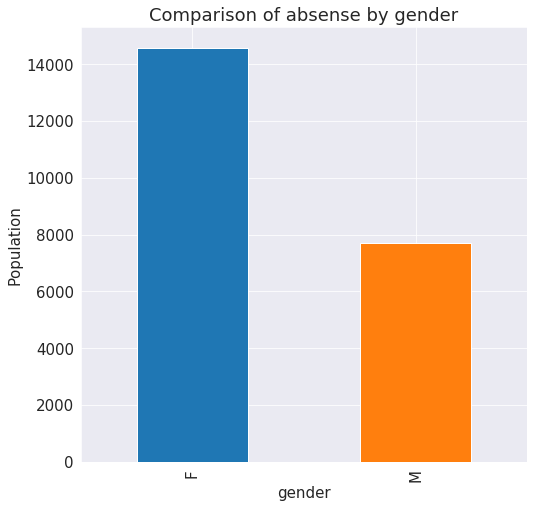

In [43]:
#Before moving to the comparison using age as a variable of consideration let's focus only on men compared to women:
bar_gr('gender','Comparison of absense by gender','gender','Population',['F','M'])

We see that there is a big difference, does this depends on the population of women or is it a general trend?

In [44]:
#Not to repeat bar graphs:
def bar_gr_norm(array1,array2,name1,name2,x,y,title):
    plt.figure(figsize = (8,8))
    plt.bar([0], array1[array1.no_show == 'Yes'].count()[0]/array1.count()[0], 0.2, color = 'b')
    plt.bar([0.4], array2[array2.no_show == 'Yes'].count()[0]/array2.count()[0], 0.2, color = 'orange')
    plt.xticks([0,0.4],[name1,name2],fontsize = 12);
    plt.xlabel(x,fontsize = 15)
    plt.ylabel(y,fontsize = 15)
    plt.title(title, fontsize = 18)

In [45]:
#First we gather the data:
women_tot = data_modif[data_modif.gender == 'F']
men_tot = data_modif[data_modif.gender == 'M']

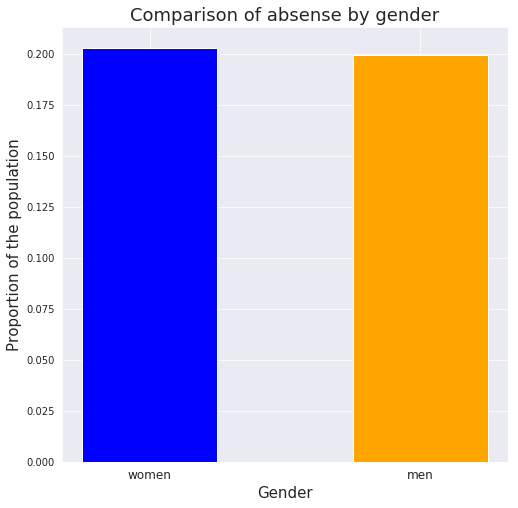

In [46]:
bar_gr_norm(women_tot,men_tot,'women','men','Gender','Proportion of the population','Comparison of absense by gender')


We see that the difference is because there is way more women than men in the data. But this is nothing new, this was something mentioned in the documentation. Women tend to take more care of their health. Through normalization we confirmed that. For the next part, let's focus on certain age.

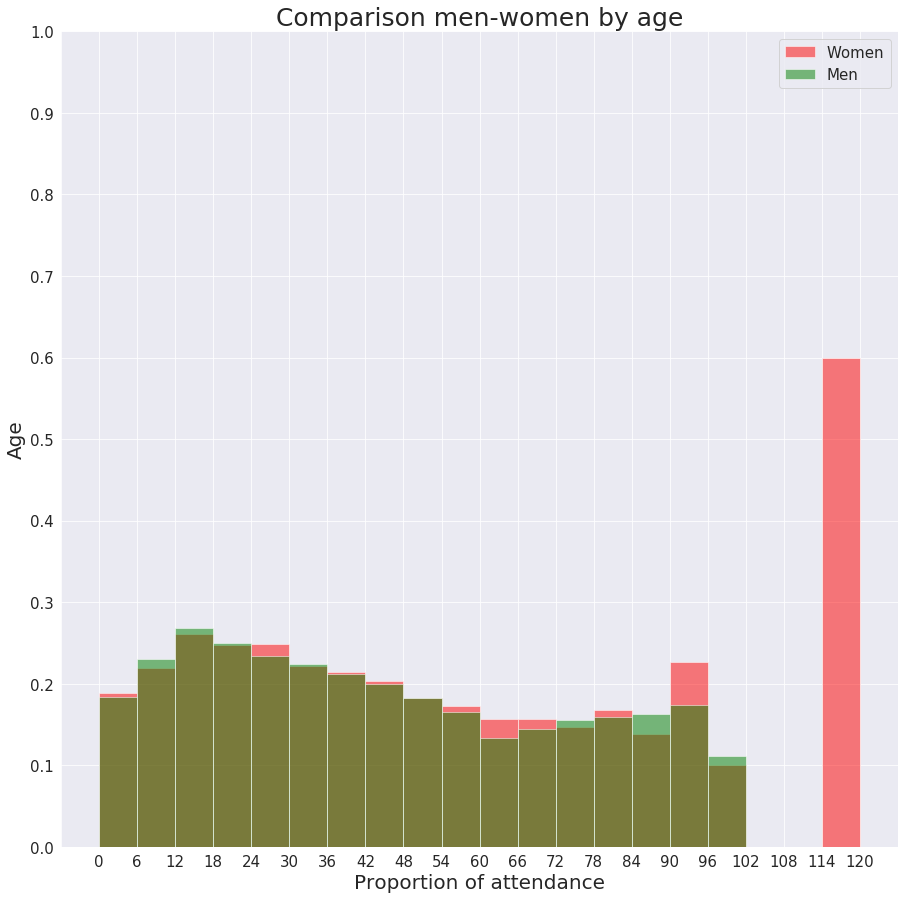

In [47]:
#Now let's do the disctinction using the age as parameter:
gr_ages('Comparison men-women by age','Proportion of attendance','Age',women_tot,'Women','r',men_tot,'Men','g')


Now we see that the bars are almost the same, so the only conclusion that we can make until here is that there are more women than men in the dataset. The last bar has the same problem as the previous question.

<a id = 'quest3'></a>

### Question 3: Does receiving a sms affect the rate of assistance?

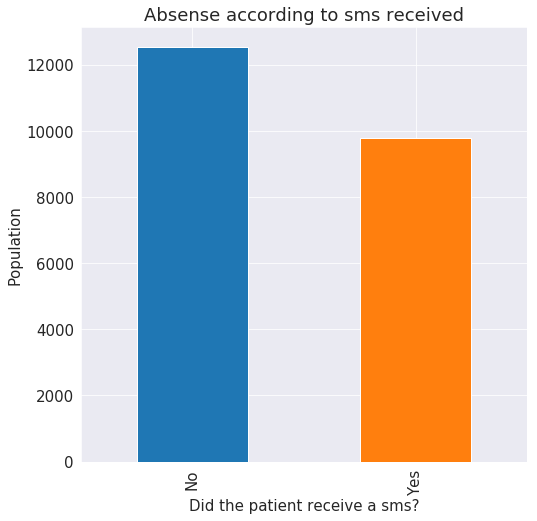

In [48]:
#First, without normalizing:
bar_gr('sms_received','Absense according to sms received','Did the patient receive a sms?','Population',['No','Yes'])

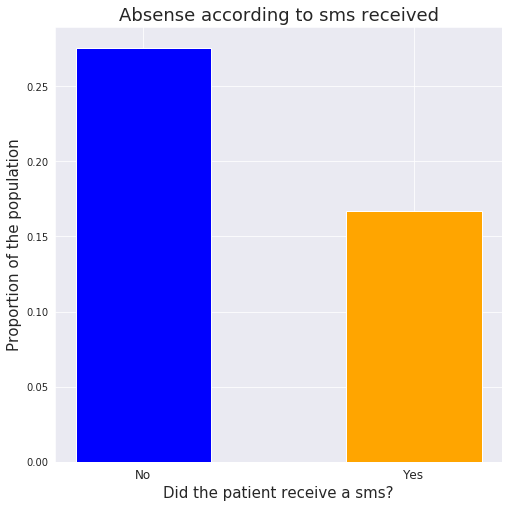

In [49]:
#It looks like there is a trend to have even a worse effect, let's see if that's the case with the normalized
#graph:

sms_yes = data_modif[data_modif.sms_received ==1]
sms_no = data_modif[data_modif.sms_received==0]

bar_gr_norm(sms_yes,sms_no,'No','Yes','Did the patient receive a sms?','Proportion of the population',
            'Absense according to sms received')

It looks like there really is a difference between receiving an sms or not! So the previous graph was a result of the fact that there is more people that do not receive an sms compared to the ones that do receive an sms.

<a id = "quest4"></a>
### Question4: Do the age and receiving a sms affect the rate of assistance?

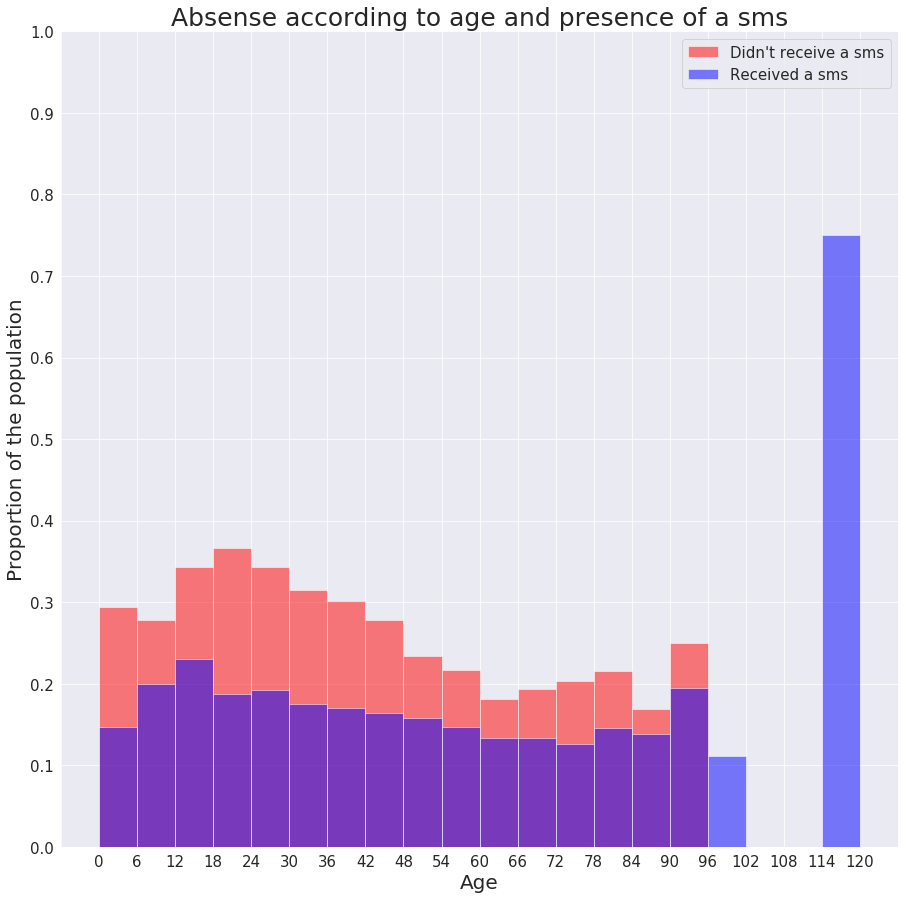

In [59]:
#Let's use the data that we organized in the previous question:

gr_ages('Absense according to age and presence of a sms', 'Age',
        'Proportion of the population',sms_yes,'Didn\'t receive a sms','r',sms_no,'Received a sms','b')

It looks like the difference between people that received the sms and people that didn't has a tendency to decrease as long as the age is increasing. This could indicate that receiving a sms do make a difference for young people, but the effect is not as strong for older people.


<a id = 'quest5'></a>

### Question5: Is there any difference in assistance between patients that make an appointment for the same day in comparison to the ones that do not? 

In [53]:
same_day = data_modif[data_modif.diff_app == 0]
other_day = data_modif[data_modif.diff_app != 0]

#First we confirm that we have enough data to be considered relevant:
same_day.shape

(43775, 6)

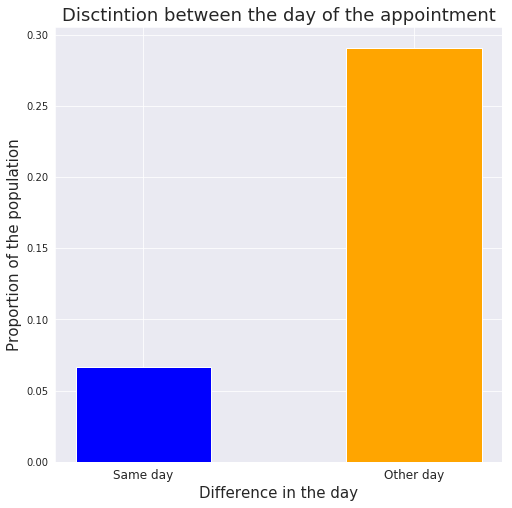

In [57]:
#So let's make the graphs:
bar_gr_norm(same_day,other_day,'Same day', 'Other day','Difference in the day',
            'Proportion of the population','Disctintion between the day of the appointment')

As we see, there is a noticeable difference between the two graphs.

<a id='conclusions'></a>
## Conclusions


1) There is a maximum of absense between 12 and 18 years.

2) There is a local maximum of absense between 90 and 96 years.

3) Women tend to care more about their health

4) Receiving an sms tend to make a difference in the absense rate.

5) The effect previosly mentioned tends to slow down as the age increases.

6) People tend to assist more if the appointment that they have made is for the same day.